# Learning about scipy (especially scipy.stats)

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
# Uncomment import if needed
# import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

## Frozen distributions

In [2]:
n = 9
p = 0.5
rv = stats.binom(n, p)  # Returns a "frozen" distribution (fixed parameters)
rv.pmf(6)

0.16406250000000003

In [3]:
# The `ppf` method computes the specified "quantile" (the first argument)
# of the (binomial) distribution characterized by `n` total tosses with
# `p` successes (water)
xs = np.linspace(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
xs

array([1.        , 1.14285714, 1.28571429, 1.42857143, 1.57142857,
       1.71428571, 1.85714286, 2.        , 2.14285714, 2.28571429,
       2.42857143, 2.57142857, 2.71428571, 2.85714286, 3.        ,
       3.14285714, 3.28571429, 3.42857143, 3.57142857, 3.71428571,
       3.85714286, 4.        , 4.14285714, 4.28571429, 4.42857143,
       4.57142857, 4.71428571, 4.85714286, 5.        , 5.14285714,
       5.28571429, 5.42857143, 5.57142857, 5.71428571, 5.85714286,
       6.        , 6.14285714, 6.28571429, 6.42857143, 6.57142857,
       6.71428571, 6.85714286, 7.        , 7.14285714, 7.28571429,
       7.42857143, 7.57142857, 7.71428571, 7.85714286, 8.        ])

In [4]:
# Notice the difference, the `ppf` method computes "quantiles" (percentages)
# and so expects a value between 0 and 1. The `pmf` samples the distribution
# thereby requiring a value in the range (0, n]. (Remember the origin of
# the binomial distribution: successes and failures. The domain of the
# distribution must then be the minimum number of successes to the maximum
# number of successes. In our case, from 0 to 9.)
xs = range(n + 1)
xs

range(0, 10)

In [5]:
rv.pmf(xs)

array([0.00195312, 0.01757813, 0.0703125 , 0.1640625 , 0.24609375,
       0.24609375, 0.1640625 , 0.0703125 , 0.01757813, 0.00195312])

## Custom (discrete) distributions

- Create a custom discrete distribution with a mapping between `xk` and `pk`
- Use the `pmf` method to access values in the custom distribution

In [6]:
xk = np.arange(7)
pk = [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
custm = stats.rv_discrete('custm', values=(xk, pk))
custm.pmf(xk)

array([0.1, 0.2, 0.3, 0.1, 0.1, 0. , 0.2])

Querying the distribution at a value that is not in the distribution domain
returns 0.

In [7]:
custm.pmf(1.5)

0.0

Plot all the values of the custom distribution.

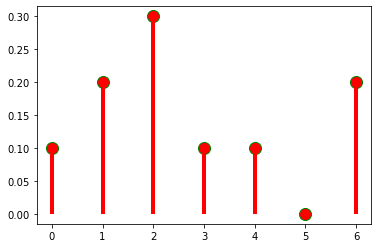

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='g')  # ms - marker size; mec - marker edge color
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)  # lw - line width
plt.show()

## Plotting the binomial (discrete) distribution for different values of p

Copied from `ch02.ipynb`

[]

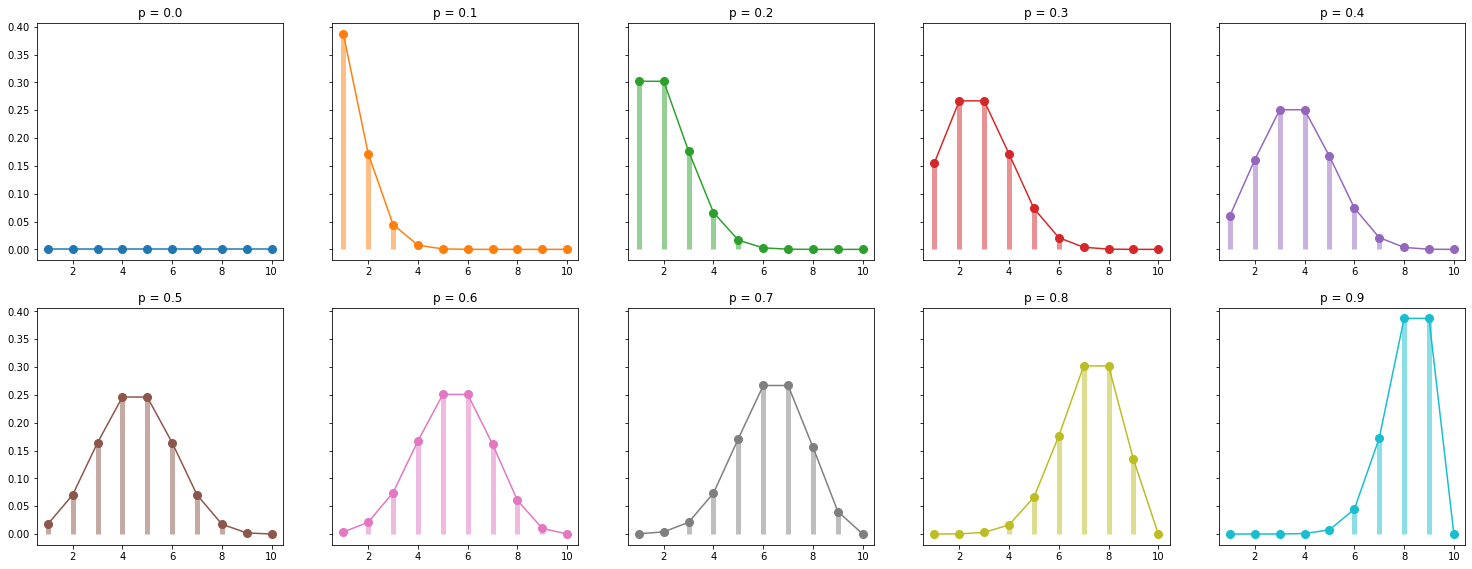

In [9]:
fig, ax = plt.subplots(2, 5, sharey=True, figsize=(25.6, 9.6))
for i, color in zip(np.arange(11), plt.rcParams['axes.prop_cycle']):
    p = i / 10
    xs = np.arange(1, 10 + 1)  # Indexing from 0 produces an anomalous graph for p = 0.0
    ax[i // 5, i % 5].plot(xs, stats.binom.pmf(xs, n, p), color=color['color'], marker='o', ms=8)
    ax[i // 5, i % 5].vlines(xs, 0, stats.binom.pmf(xs, n, p), colors=color['color'], lw=5, alpha=0.5)
    ax[i // 5, i % 5].set_title(f'p = {p}')
plt.plot()

## Learning more about frozen distributions

Freeze a binomial distribution with 6 successes of 9 trials.

In [10]:
help(stats.binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.
    
    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inve

In [11]:
n = 9
p = 0.5

In [12]:
binom_rv = stats.binom(n, p)

In [13]:
help(binom_rv)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

In [14]:
binom_rv.ppf(0), binom_rv.ppf(1)

(-1.0, 9.0)

In [15]:
np.arange(binom_rv.ppf(0.01), binom_rv.ppf(0.99))

array([1., 2., 3., 4., 5., 6., 7.])

In [16]:
np.arange(binom_rv.ppf(0.001), binom_rv.ppf(0.999))

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

Text(0.5, 1.0, 'Binomial(9, 0.5) - CDF')

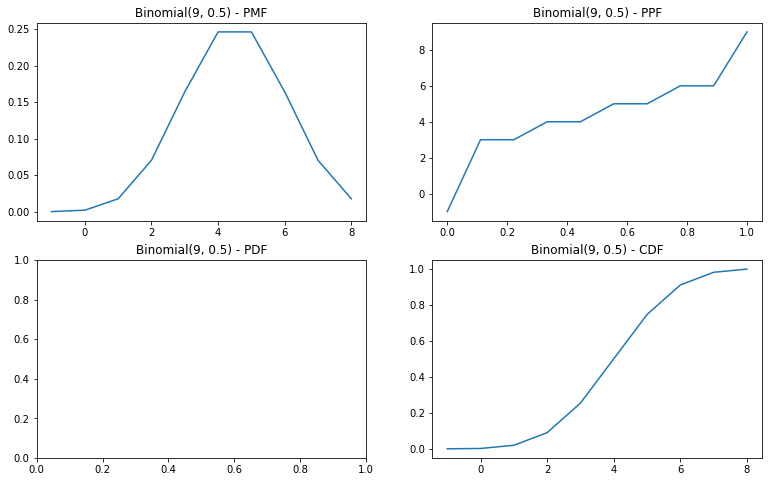

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
ax_pmf = axes[0, 0]
ax_ppf = axes[0, 1]
ax_pdf = axes[1, 0]
ax_cdf = axes[1, 1]
xs = np.arange(binom_rv.ppf(0), binom_rv.ppf(1))
# print(xs)
qs = np.linspace(0, 1, len(xs))
# print(qs)
title_prefix = f'Binomial({n}, {p})'
ax_pmf.plot(xs, binom_rv.pmf(xs))
ax_pmf.set_title(f'{title_prefix} - PMF')
ax_ppf.plot(qs, binom_rv.ppf(qs))
ax_ppf.set_title(f'{title_prefix} - PPF')
# The binomial distribution **does not** support a `pdf` 
# (because it is a discrete distribution?)
# ax_pdf.plot(xs, binom_rv.pdf(xs))
ax_pdf.set_title(f'{title_prefix} - PDF')
ax_cdf.plot(xs, binom_rv.cdf(xs))
ax_cdf.set_title(f'{title_prefix} - CDF')